In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path = "/home/cc/cassandra-tester/I_5k_Q95k/skiplist/out.txt"
def calculate_total_times(path):
    #f = open("/home/cc/cassandra-tester/I_5k_Q95k/skiplist/out.txt")
    f = open(path)
    lines = f.readlines()
    count = 0
    total_query_time = 0
    total_insert_time = 0
    for i in range(len(lines)):
        if "Parsing SELECT" in lines[i]:
            j = i
            while(True):
                j+=1
                if "Request complete" in lines[j]:
                    #count+=1
                    line = lines[j].lstrip()
                    #print(line)
                    line = line.split("|")
                    time = int(line[3].lstrip())
                    #print(time)
                    total_query_time+=time
                    break
        if "Parsing INSERT" in lines[i]:
            j = i
            while(True):
                j+=1
                if "Request complete" in lines[j]:
                    #count+=1
                    line = lines[j].lstrip()
                    #print(line)
                    line = line.split("|")
                    time = int(line[3].lstrip())
                    #print(time)
                    total_insert_time+=time
                    break
    #print(f"Total Query Time: {total_query_time/1000000}")
    #print(f"Total Insert Time: {total_insert_time/1000000}")
    return total_query_time, total_insert_time
#print(count)
        

In [4]:
workloads = ['I_95k_Q5k', 'I_80k_Q20k', 'I_50k_Q50k', 'I_20k_Q80k', 'I_5k_Q95k']
memtables = ['skiplist', 'trie']
it_values = {memtable: [] for memtable in memtables}
qt_values = {memtable: [] for memtable in memtables}
for workload in workloads:
    for memtable in memtables:
        path = "/home/cc/cassandra-tester/"+workload+"/"+memtable+"/out.txt"
        #print(workload, memtable)
        qt,it = calculate_total_times(path)
        it_values[memtable].append(it)
        qt_values[memtable].append(qt)


In [5]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        h = height/1000000
        ax.annotate(f'{h:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 8)

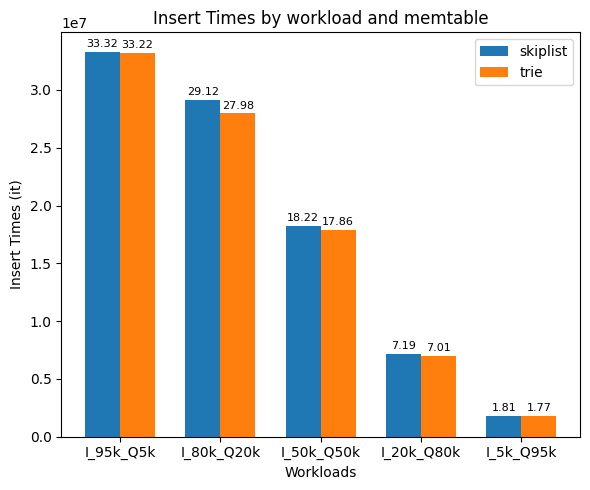

In [13]:
# Plotting the grouped bar chart for 'it'
x = np.arange(len(workloads))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (6,5))
rects1 = ax.bar(x - width/2, it_values['skiplist'], width, label='skiplist')
rects2 = ax.bar(x + width/2, it_values['trie'], width, label='trie')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Workloads')
ax.set_ylabel('Insert Times (it)')
ax.set_title('Insert Times by workload and memtable')
ax.set_xticks(x)
ax.set_xticklabels(workloads)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


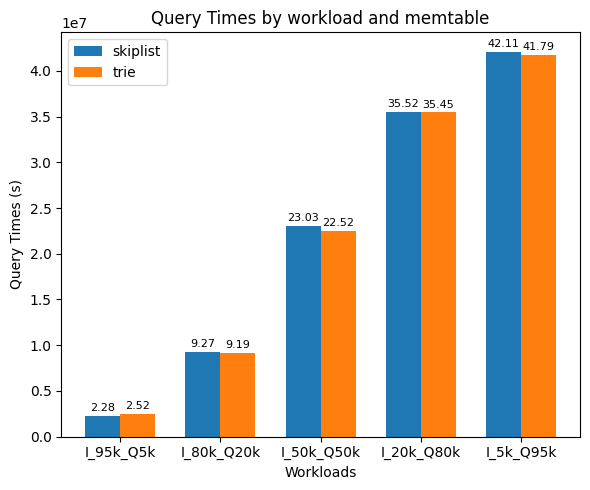

In [12]:
# Plotting the grouped bar chart for 'qt'
fig, ax = plt.subplots(figsize = (6,5))
rects1 = ax.bar(x - width/2, qt_values['skiplist'], width, label='skiplist')
rects2 = ax.bar(x + width/2, qt_values['trie'], width, label='trie')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Workloads')
ax.set_ylabel('Query Times (s)')
ax.set_title('Query Times by workload and memtable')
ax.set_xticks(x)
ax.set_xticklabels(workloads)
ax.legend()

# Function to add a label above each bar in *rects*, displaying its height to 2 dp.
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [56]:
workloads = ['RQ_0.05', 'RQ_0.1', 'RQ_0.2', 'RQ_0.3', 'RQ_0.4', 'RQ_0.5', 'RQ_0.6', 'RQ_0.7', 'RQ_0.8']
memtables = ['skiplist', 'trie']
it_values = {memtable: [] for memtable in memtables}
qt_values = {memtable: [] for memtable in memtables}
for workload in workloads:
    for memtable in memtables:
        path = "/home/cc/cassandra-tester/"+workload+"/"+memtable+"/out.txt"
        #print(workload, memtable)
        qt,it = calculate_total_times(path)
        it_values[memtable].append(it)
        qt_values[memtable].append(qt)

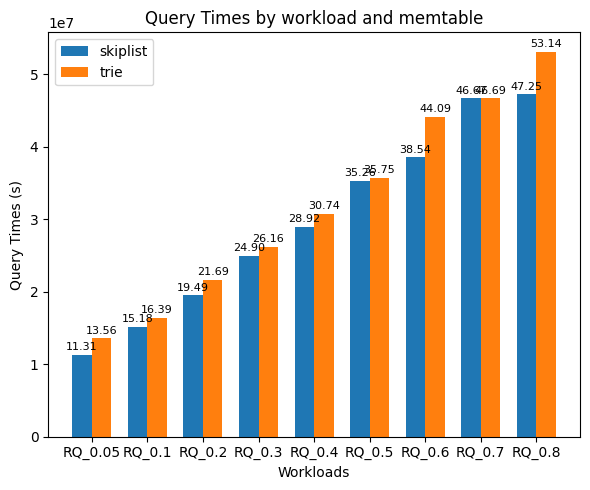

In [57]:
# Plotting the grouped bar chart for 'qt'
fig, ax = plt.subplots(figsize = (6,5))
rects1 = ax.bar(x - width/2, qt_values['skiplist'], width, label='skiplist')
rects2 = ax.bar(x + width/2, qt_values['trie'], width, label='trie')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Workloads')
ax.set_ylabel('Query Times (s)')
ax.set_title('Query Times by workload and memtable')
ax.set_xticks(x)
ax.set_xticklabels(workloads)
ax.legend()

# Function to add a label above each bar in *rects*, displaying its height to 2 dp.
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

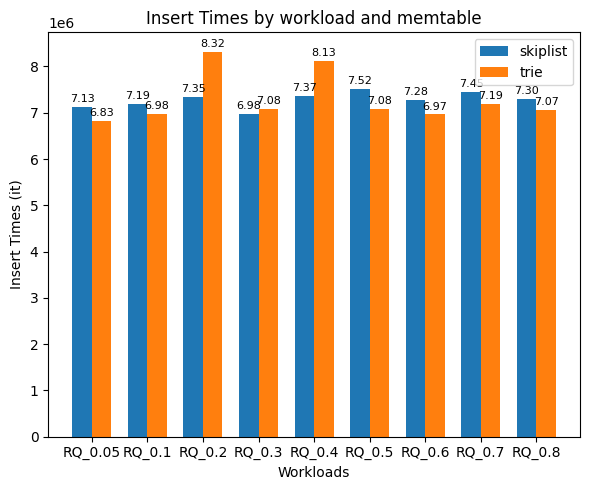

In [58]:
# Plotting the grouped bar chart for 'it'
x = np.arange(len(workloads))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (6,5))
rects1 = ax.bar(x - width/2, it_values['skiplist'], width, label='skiplist')
rects2 = ax.bar(x + width/2, it_values['trie'], width, label='trie')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Workloads')
ax.set_ylabel('Insert Times (it)')
ax.set_title('Insert Times by workload and memtable')
ax.set_xticks(x)
ax.set_xticklabels(workloads)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [2]:
f = open("/home/cc/cassandra-tester/RQ_0./workload.txt")
lines = f.readlines()
s = []
for l in lines:
    if l.startswith("S"):
        # l = l.lstrip().split(";")[0]
        s.append(l)

len(s)

200

In [4]:
import numpy as np
len(np.unique(s))

114

In [45]:
#f = open("/home/cc/cassandra-tester/RQ_0.2/workload.txt")
f = open("/home/cc/cassandra-tester/I_5k_Q95k/trie/commands.cql")
lines = f.readlines()
c=0
for line in lines:
    if line.startswith("SELECT"):
        c+=1
print(c)

95000
